# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
%pip install statsmodels

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts  
import numpy as np
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)], 
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

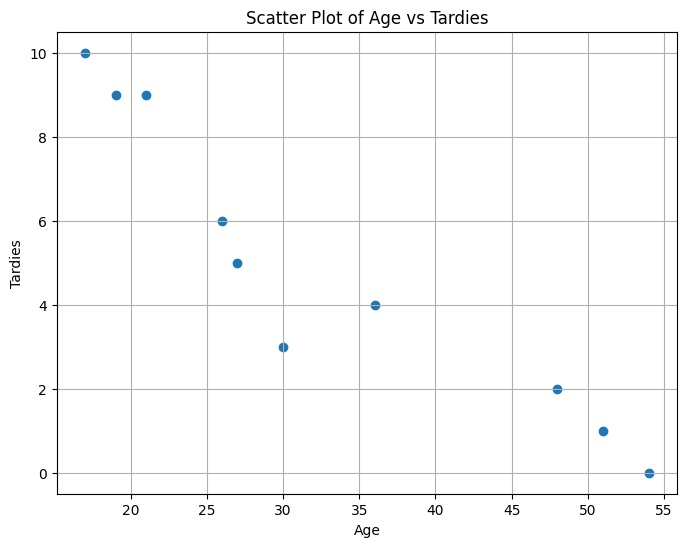

In [4]:
# Your code here.
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Scatter Plot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# Efectivamente parece ser que cuanto más jóvenes son los alumnos, tiene más retrasos. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
covariance_matrix = student_data.cov()
correlation_matrix = student_data.corr()

print("Matriz de Covarianza:")
print(covariance_matrix)

print("\nMatriz de Correlación:")
print(correlation_matrix)


Matriz de Covarianza:
           StudentID         Age    Tardies
StudentID   9.166667    7.722222  -3.722222
Age         7.722222  187.655556 -45.566667
Tardies    -3.722222  -45.566667  12.544444

Matriz de Correlación:
           StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000


In [ ]:
# La covarianza y la correlación miden la relación entre dos variables:
# La covarianza indica la dirección de la relación (positiva o negativa) pero no su fuerza. 
# En este caso, la covarianza entre Edad y Tardanzas es negativa, indicando una tendencia decreciente.

# La correlación normaliza esta medida, proporcionando un valor entre -1 y 1 que indica tanto la dirección como la fuerza. 
# En este caso es aproximadamente -0.94, lo cual indica una fuerte relación negativa entre la edad y las tardanzas.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.
X=student_data.drop('Tardies', axis=1)
y=student_data['Tardies']

X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42)

linreg=LinearRegression()


In [10]:
linreg.fit(X_train, y_train)

LinearRegression()

Plot your regression model on your scatter plot.

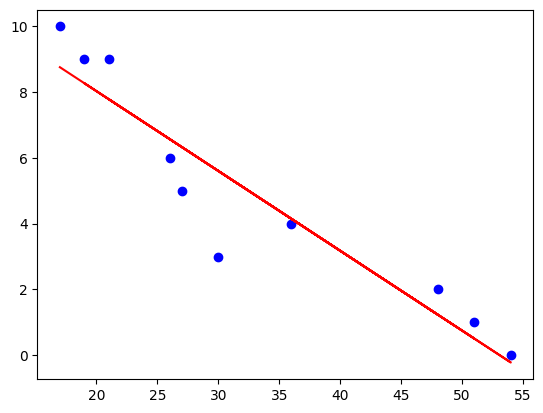

In [14]:
# Your code here.
plt.plot(X.Age, y, 'o', color='blue') #crear el gráfico de dispersión

m, b = np.polyfit(X.Age, y, 1) #obtener pendiente y ordenada al origen

plt.plot(X.Age, m*X.Age+b, color='red') #agrega la línea de regresión lineal al gráfico de dispersión

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

# La línea de regresión y los resultados estadísticos sugieren que hay una relación significativa y negativa entre la edad y las tardanzas. 
# Parece que la edad podría ser un buen predictor de las tardanzas.

# Sin embargo creo que también hay que tener en cuenta otras variables como el tamaño de la muestra o la validez de las suposiciones de regresión lineal.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
# Import any libraries you may need & the data
vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
# Your response here. 
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_selected = vehicles[selected_variables]

correlations = vehicles_selected.corr()['CO2 Emission Grams/Mile']
print(correlations)

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here. 
linreg_2=LinearRegression()

X_train_2, X_test_2, y_train_2, y_test_2= tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42)

In [21]:
linreg_2.fit(X_train_2, y_train_2)

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [22]:
# Your response here. 
X_train_2_sm = sm.add_constant(X_train_2)

model_2 = sm.OLS(y_train_2, X_train_2_sm).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.005e+05
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             16:13:17   Log-Likelihood:            -1.2113e+05
No. Observations:                    28761   AIC:                         2.423e+05
Df Residuals:                        28755   BIC:                         2.423e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               755.6935     21.507     35.137      0.000     713.539     797.848
Year                 -0.3156      0.011    -29.360      0.000      -0.337      -0.295
Cylinders             1.7940      0.092     19.497      0.000       1.614       1.974
Fuel Barrels/Year    19.2310      0.068    281.981      0.000      19.097      19.365
Combined MPG         -2.9336      0.047    -62.750      0.000      -3.025      -2.842
Fuel Cost/Year        0.0320      0.001     59.724      0.000       0.031       0.033
==============================================================================
Omnibus:                    58182.680   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        238983414.038
Skew:                          16.711   Prob(JB):                         0.00
Kurtosis:                     448.315   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# R-squared: Es una medida de cuánta variabilidad en la variable dependiente (CO2 Emission Grams/Mile) es explicada por el modelo. En este caso, alrededor del 98.1% de la variabilidad en las emisiones de CO2 se explica por las variables predictoras.
# P value: En este caso, todos los coeficientes tienen valores p muy bajos, indicando que todas las variables son estadísticamente significativas.
# Coeficiente de las variables: En este caso, la variable más importante sería "Fuel Barrels/Year" con un coeficiente de 19.2310. Esto sugiere que la cantidad de barriles de combustible utilizados por año tiene el mayor impacto en las emisiones de CO2.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 